In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df1=pd.read_csv('auto-mpg.csv')
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### A lot of Independent variables here, for now just consider the following 2 IVs

In [7]:
df2=df1[['horsepower','weight','mpg']]
df2.head()

,horsepower,weight,mpg
0,130,3504,18.0
1,165,3693,15.0
2,150,3436,18.0
3,150,3433,16.0
4,140,3449,17.0


In [8]:
df2

,horsepower,weight,mpg
0,130,3504,18.0
1,165,3693,15.0
2,150,3436,18.0
3,150,3433,16.0
4,140,3449,17.0
...,...,...,...
393,86,2790,27.0
394,52,2130,44.0
395,84,2295,32.0
396,79,2625,28.0


### To check the types

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  398 non-null    object 
 1   weight      398 non-null    int64  
 2   mpg         398 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


### As horsepower is object type, so to see what type of values it has

In [10]:
df2['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

### Dataset with '?'

In [11]:
df2[df2['horsepower'] == '?']

,horsepower,weight,mpg
32,?,2046,25.0
126,?,2875,21.0
330,?,1835,40.9
336,?,2905,23.6
354,?,2320,34.5
374,?,3035,23.0


### As '?' is noise in the data. For simplicity i will use the dataset without the rows having '?'

In [12]:
df3=df2[df2['horsepower'] != '?']
df3

,horsepower,weight,mpg
0,130,3504,18.0
1,165,3693,15.0
2,150,3436,18.0
3,150,3433,16.0
4,140,3449,17.0
...,...,...,...
393,86,2790,27.0
394,52,2130,44.0
395,84,2295,32.0
396,79,2625,28.0


### To play with horsepower as numerical feature, just converting the type to int

In [13]:
df3['horsepower']=df3['horsepower'].astype('int')

### To see the unique values in each feature

In [14]:
df3.nunique()

horsepower     93
weight        346
mpg           127
dtype: int64

In [15]:
df3.corr()

,horsepower,weight,mpg
horsepower,1.000000,0.864538,-0.778427
weight,0.864538,1.000000,-0.832244
mpg,-0.778427,-0.832244,1.000000


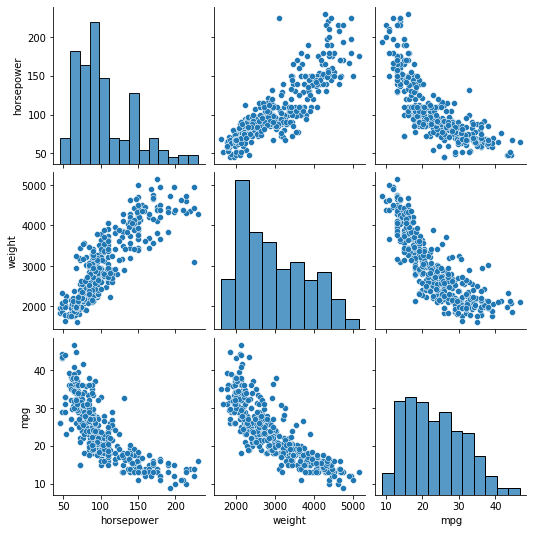

In [16]:
sns.pairplot(df3);

### Split the dataset into Independent variables and Dependent variables

In [17]:
X=df3[['horsepower','weight']]
X.head()

,horsepower,weight
0,130,3504
1,165,3693
2,150,3436
3,150,3433
4,140,3449


In [18]:
y=df3[['mpg']]
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


### Splitting the dataset into training dataset and testing dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [47]:
#X_train_2=X_train.copy()# if need later

In [21]:
X_train

,horsepower,weight
335,88,2500
397,82,2720
394,52,2130
29,88,2130
275,125,3140
...,...,...
205,75,2155
257,90,3210
73,130,4098
237,63,2051


In [48]:
y_train

,mpg
335,35.0
397,31.0
394,44.0
29,27.0
275,17.0
...,...
205,28.0
257,19.4
73,13.0
237,30.5


In [22]:
X_test

,horsepower,weight
82,97,2506
167,75,2171
356,75,2350
120,112,2868
385,67,1995
...,...,...
60,90,2408
12,150,3761
305,90,2670
165,110,3221


### Normalization

In [23]:
from sklearn.preprocessing import PowerTransformer

In [24]:
pt = PowerTransformer()

In [25]:
pt.fit(X_train)

PowerTransformer()

In [26]:
X_train=pt.transform(X_train)
X_train

array([[-0.22038092, -0.41987425],
       [-0.440778  , -0.10984565],
       [-2.02643612, -1.03324847],
       [-0.22038092, -1.03324847],
       [ 0.78411681,  0.39827703],
       [-1.21278669, -1.33418121],
       [ 1.25062924,  0.92503396],
       [-1.88360704, -0.81279481],
       [-0.51937191,  0.4954366 ],
       [ 1.28314968,  1.36687861],
       [ 0.07315184, -0.3535658 ],
       [-1.21278669, -0.60476911],
       [-0.77282483, -1.32398696],
       [-0.15158208,  0.6891707 ],
       [ 1.25062924,  1.01702514],
       [ 0.16256279,  1.02046193],
       [ 0.01134033,  0.35613129],
       [ 1.23413713,  1.45434569],
       [ 0.01134033, -0.61753643],
       [ 0.07315184, -0.56523743],
       [ 1.68273547,  0.9178814 ],
       [ 1.25062924,  1.39786602],
       [-0.32783106, -0.71847095],
       [-0.68521033, -1.15577139],
       [ 0.35716572, -0.46194204],
       [ 1.80462186,  1.07899344],
       [ 0.01134033, -0.14471236],
       [ 0.07315184, -0.03883103],
       [-0.95850177,

### Model

In [27]:
multiple_linear_regressor=LinearRegression()

In [28]:
multiple_linear_regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
df3.corr()

,horsepower,weight,mpg
horsepower,1.000000,0.864538,-0.778427
weight,0.864538,1.000000,-0.832244
mpg,-0.778427,-0.832244,1.000000


In [30]:
multiple_linear_regressor.coef_,multiple_linear_regressor.intercept_# with power transformer

(array([[-2.82996469, -3.90361223]]), array([23.41386861]))

In [31]:
multiple_linear_regressor.score(pt.transform(X_test),y_test)# with power transformer

0.7689166461038088

In [32]:
multiple_linear_regressor.predict(pt.transform(X_test))

array([[24.81100762],
       [29.21741376],
       [28.02464002],
       [21.72583421],
       [31.59884676],
       [28.98970156],
       [29.88024337],
       [14.47530691],
       [26.60201442],
       [28.79327227],
       [19.83720333],
       [29.28592094],
       [16.72306665],
       [31.57614295],
       [25.94083486],
       [17.56162891],
       [26.86948754],
       [32.67053735],
       [11.68014711],
       [22.4190401 ],
       [28.70222919],
       [18.71190407],
       [17.26517707],
       [13.83545168],
       [12.35503519],
       [15.3727188 ],
       [31.06818613],
       [19.41631384],
       [21.07102672],
       [26.77611833],
       [17.40314065],
       [24.36281245],
       [13.51580614],
       [21.88700428],
       [19.84573409],
       [15.02661925],
       [19.38489123],
       [19.43384628],
       [31.83721803],
       [28.07094019],
       [12.65761985],
       [13.01888492],
       [21.36418134],
       [22.48090395],
       [23.02967447],
       [18

In [33]:
predictions=multiple_linear_regressor.predict(pt.transform(X_test)).flatten()
predictions

array([24.81100762, 29.21741376, 28.02464002, 21.72583421, 31.59884676,
       28.98970156, 29.88024337, 14.47530691, 26.60201442, 28.79327227,
       19.83720333, 29.28592094, 16.72306665, 31.57614295, 25.94083486,
       17.56162891, 26.86948754, 32.67053735, 11.68014711, 22.4190401 ,
       28.70222919, 18.71190407, 17.26517707, 13.83545168, 12.35503519,
       15.3727188 , 31.06818613, 19.41631384, 21.07102672, 26.77611833,
       17.40314065, 24.36281245, 13.51580614, 21.88700428, 19.84573409,
       15.02661925, 19.38489123, 19.43384628, 31.83721803, 28.07094019,
       12.65761985, 13.01888492, 21.36418134, 22.48090395, 23.02967447,
       18.37145402, 12.5172429 , 31.65333666, 21.00743029, 10.81715393,
       16.26365815, 21.76284408, 24.49237338, 27.34845112, 33.60885398,
       22.34517424, 22.93268697, 25.48566698, 25.16067925, 34.3399782 ,
       23.3384251 , 26.08921296, 32.05413824, 19.70524194, 22.52711661,
       21.98773357, 21.93947791, 16.04212663, 31.60473647, 11.39

### Plots

In [35]:
import matplotlib.pyplot as plt

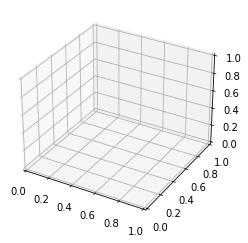

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')


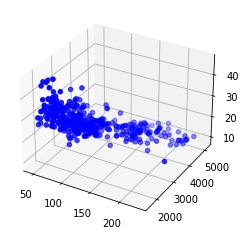

In [37]:
ax = plt.axes(projection='3d')
ax.scatter3D(df3['horsepower'],df3['weight'], df3['mpg'], color='blue');

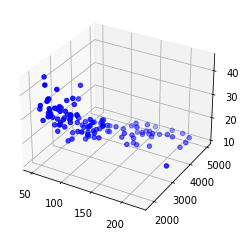

In [38]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_test['horsepower'],X_test['weight'], y_test['mpg'], color='blue');

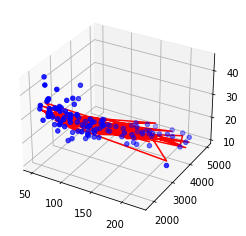

In [39]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_test['horsepower'],X_test['weight'], y_test['mpg'], color='blue');
ax.plot3D(X_test['horsepower'],X_test['weight'], predictions, color='red');

In [40]:
X_test

,horsepower,weight
82,97,2506
167,75,2171
356,75,2350
120,112,2868
385,67,1995
...,...,...
60,90,2408
12,150,3761
305,90,2670
165,110,3221


In [41]:
dataset_predictions=X_test.copy()
dataset_predictions['mpg']=y_test
dataset_predictions['predicted_mpg']=predictions
dataset_predictions.head()

,horsepower,weight,mpg,predicted_mpg
82,97,2506,23.0,24.811008
167,75,2171,29.0,29.217414
356,75,2350,32.4,28.024640
120,112,2868,19.0,21.725834
385,67,1995,38.0,31.598847


In [42]:
dataset_predictions2=dataset_predictions.sort_values(by='horsepower')
dataset_predictions2.head()

,horsepower,weight,mpg,predicted_mpg
326,48,2335,43.4,32.670537
246,52,1985,32.8,34.277282
248,60,1800,36.1,34.339978
332,62,1845,29.8,33.608854
347,65,1975,37.0,32.054138


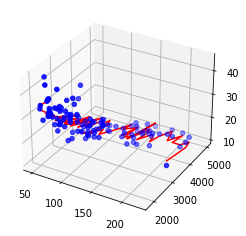

In [43]:
ax = plt.axes(projection='3d')
ax.scatter3D(dataset_predictions2['horsepower'],dataset_predictions2['weight'], dataset_predictions2['mpg'], color='blue');
ax.plot3D(dataset_predictions2['horsepower'],dataset_predictions2['weight'], dataset_predictions2['predicted_mpg'], 'red')

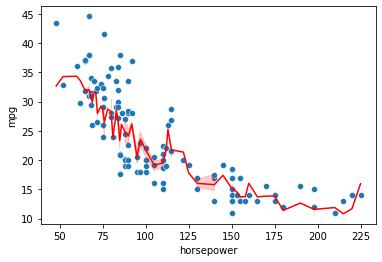

In [44]:
sns.scatterplot(dataset_predictions2['horsepower'], dataset_predictions2['mpg']);
sns.lineplot(dataset_predictions2['horsepower'], dataset_predictions2['predicted_mpg'],color='red');

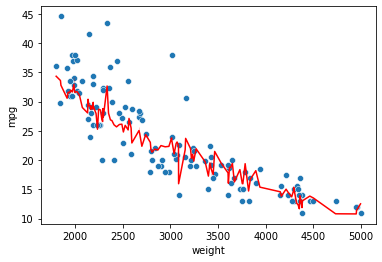

In [45]:
sns.scatterplot(dataset_predictions2['weight'], dataset_predictions2['mpg']);
sns.lineplot(dataset_predictions2['weight'], dataset_predictions2['predicted_mpg'],color='red');

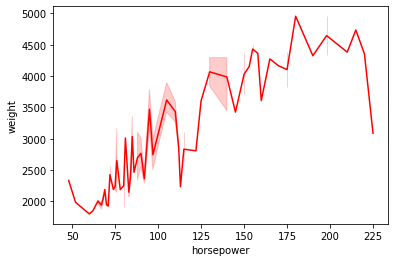

In [46]:

sns.lineplot(dataset_predictions2['horsepower'],dataset_predictions2['weight'],color='red');